##  1.Defining Problem Statement 

Problem Statement :

The Netflix dataset poses challenges related to understanding and leveraging the vast amount of data available from Netflix's streaming platform. The dataset comprises various types of information, such as Director,Cast, Ratings, Genre(Listed_in), Movies and TV shows. The goal is to extract meaningful insights for analyzing the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.


#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



####  Loading Dataset

In [14]:
df = pd.read_csv("C:\SANU\SCALER_ DATA_ SCIENCE\course\Python\Project\d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_000_940_original_netflix.csv")

In [15]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 1. Defining Problem Statement and Analysing basic metrics 


- Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to --'category',missing value detection, statistical summary

#### Exploratory Data Analysis
- Exploratory data analysis: Why It's Important ?

- For solving any business case,there are no short cuts. After collecting the data, we cannot
  immediately go on to the Visualisations or model-building phase. The exploratory data
  analytics (EDA) stage is crucial in helping us outline our strategy in an organised way.
  Exploratory data analysis is the process of examining data, coming up with new ideas, and
  spotting hidden patterns.

####  Non-Graphical Analysis: Value Counts and Unique attributes

- So based on the result we can also confirm that Netflix dataset have 12 columns.Now we will dig
  more deeper to know about the dataset and values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### 1.Shape of the Data

In [17]:
df.shape

(8807, 12)

#### 2.Rename the "listed_in" into genre 

In [18]:
df.rename(columns={"listed_in": "genre"},inplace=True)
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 3. Removing "S" from show_id

In [19]:
df["show_id"]=df["show_id"].apply(lambda x: x.replace("s",""))
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 4. Describing the String values

In [8]:
df.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
genre,8807,514,"Dramas, International Movies",362


# Movies vs TV Shows

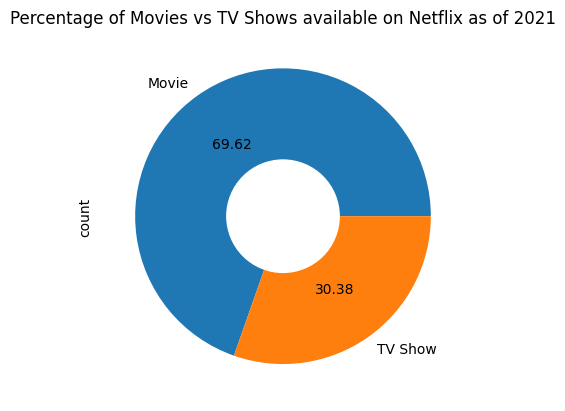

In [28]:
plt.title("Percentage of Movies vs TV Shows available on Netflix as of 2021")
df['type'].value_counts().plot(kind = "pie", autopct="%.2f")
circle = plt.Circle((0, 0), 0.38, color='white')
plt.gcf().gca().add_artist(circle)
plt.show()

- Nearly 2/3rd of the content on netflix are movies and remaining 1/3rd of them are TV Show.

##  Before Un-nesting the "Director" column

In [29]:
df["director"].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

##  After un-nesting the "Director" columns

In [30]:
df_dir=df[["title","director"]]
df_dir["director"]=df_dir["director"].str.split(", ")
df_dir= df_dir.explode("director")

## Top 10 directors

In [31]:
df_dir["director"].value_counts().head(10)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64

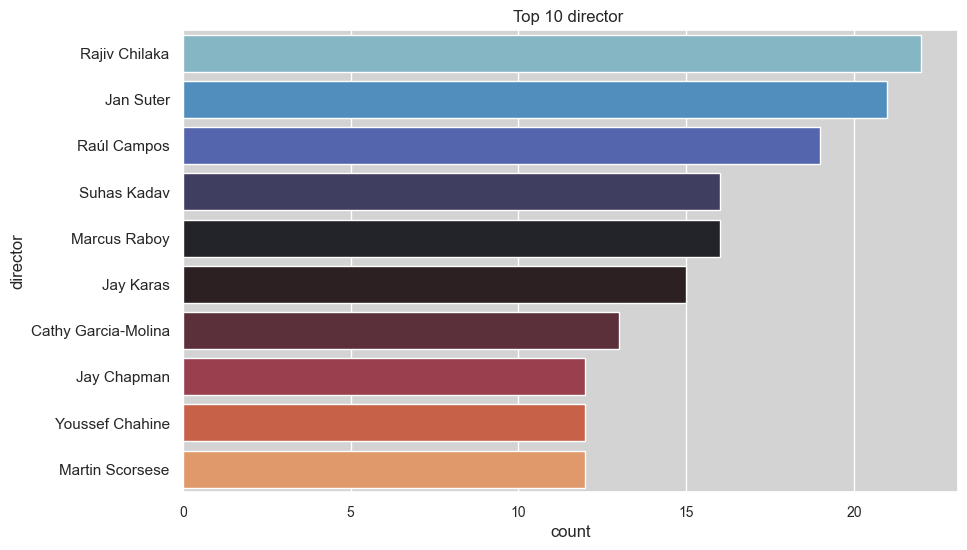

In [32]:
sns.set_theme(style="whitegrid")
sns.set(rc={"axes.facecolor":"lightgrey"})
plt.figure(figsize= (10,6))
sns.countplot(palette="icefire",y=df_dir["director"],order=pd.value_counts(df_dir["director"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top 10 director ")
plt.show()

## Top 10 Actors

In [33]:
df_actor=df[["title","cast"]]
df_actor["cast"]=df_actor["cast"].str.split(",")
df_actor= df_actor.explode("cast")

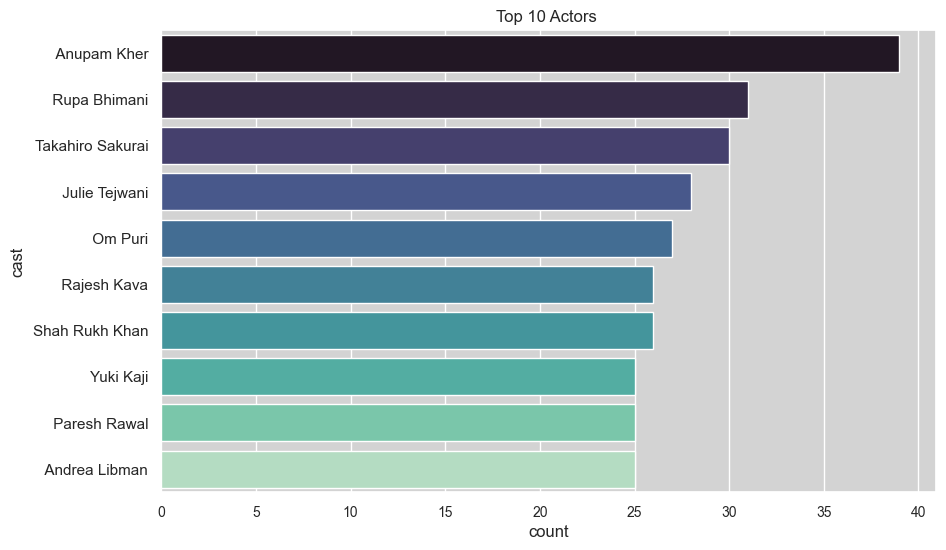

In [34]:
sns.set_theme(style="whitegrid")
sns.set(rc={"axes.facecolor":"lightgrey"})
plt.figure(figsize= (10,6))
sns.countplot(palette="mako",y=df_actor["cast"],order=pd.value_counts(df_actor["cast"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top 10 Actors ")
plt.show()

## Top 10 Countries  Content

In [35]:
df_country=df[["country"]]
df_country["country"]=df_country["country"].str.split(", ")
df_country= df_country.explode("country")

In [36]:
df_country["country"].value_counts().head(10)

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

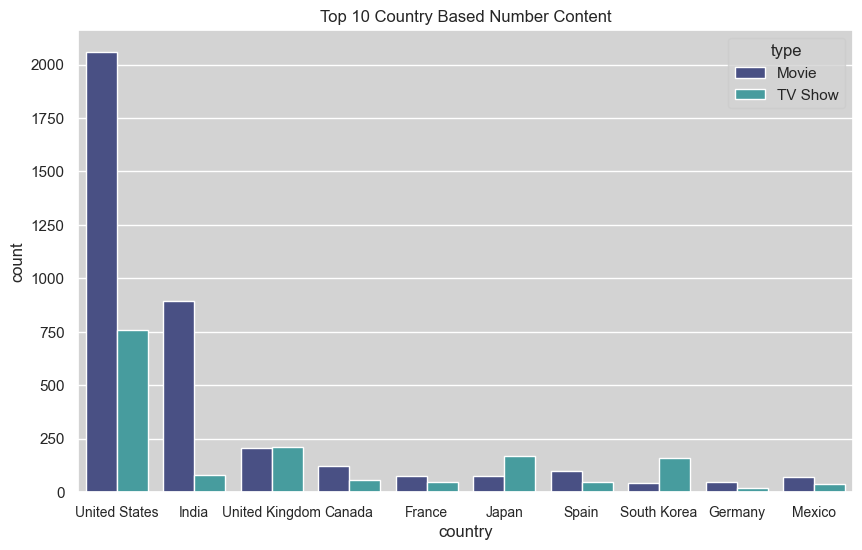

In [37]:
sns.set_theme(style="whitegrid")
sns.set(rc={"axes.facecolor":"lightgrey"})
plt.figure(figsize= (10,6))
sns.countplot(palette="mako",x=df["country"],hue=df["type"],order=pd.value_counts(df_country["country"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top 10 Country Based Number Content")
plt.show()

- The above top 10 countries contribute 85.76% of the total content.
- United States, India, United Kingdom, Canada and France contribute 72.41% of the total content.
- United States alone contributes to 41.9% of the total content on Netflix.

#### Percentage Contribution Top 10 Countries to the total content of Netfix

In [38]:
total_count = df["title"].value_counts().sum()
top_10 = df_country["country"].value_counts().head(10).sum()
print(round((top_10/total_count)*100,2),"%")

85.76 %


#### Percentage Contribution Top 5 Countries to the total content of Netfix

In [39]:
total_count = df["title"].value_counts().sum()
top_5 = df_country["country"].value_counts().head(5).sum()
print(round((top_5/total_count)*100,2),"%")

72.41 %


#### Percentage Contribution Top 1 Countries to the total content of Netfix

In [40]:
total_count = df["title"].value_counts().sum()
top_1 = df_country["country"].value_counts().head(1).sum()
print(round((top_1/total_count)*100,2),"%")

41.89 %


- Nearly 2/3rd of the content on netflix are movies and remaining 1/3rd of them are TV Show. We can see that US, India, United Kingdom, Canada and France contribute 72.4% of the top 5 countries.

## Top 10 Genres 

In [41]:
df_genre=df[["genre"]]
df_genre["genre"]=df_genre["genre"].str.split(", ")
df_genre= df_genre.explode("genre")

In [42]:
df_genre["genre"].value_counts().head(10)

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

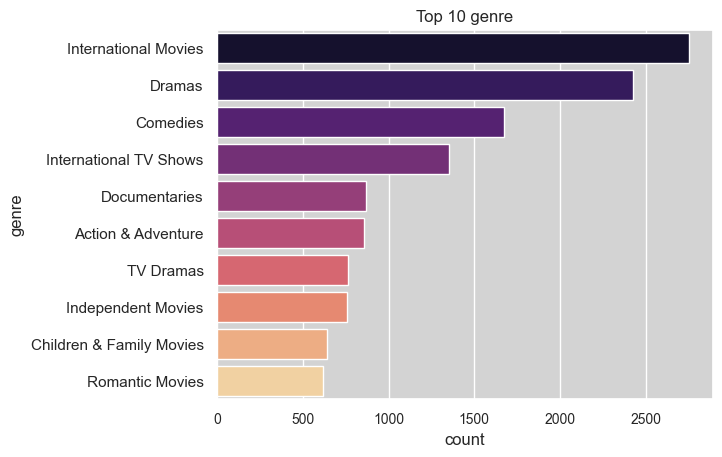

In [43]:
sns.set_theme(style="whitegrid")
sns.set(rc={"axes.facecolor":"lightgrey"})
sns.countplot(palette="magma",y=df_genre["genre"],order=pd.value_counts(df_genre["genre"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top 10 genre")
plt.show()

##  Content Released Year wise

In [44]:
df["release_year"].value_counts().head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

In [61]:
year_wise =pd.value_counts(df["release_year"]).reset_index().head(30)
year_wise.rename(columns={"year_of_release":"release_year","count":"No_of_movies_and_tv_shows"},inplace=True)
year_wise

,release_year,No_of_movies_and_tv_shows
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


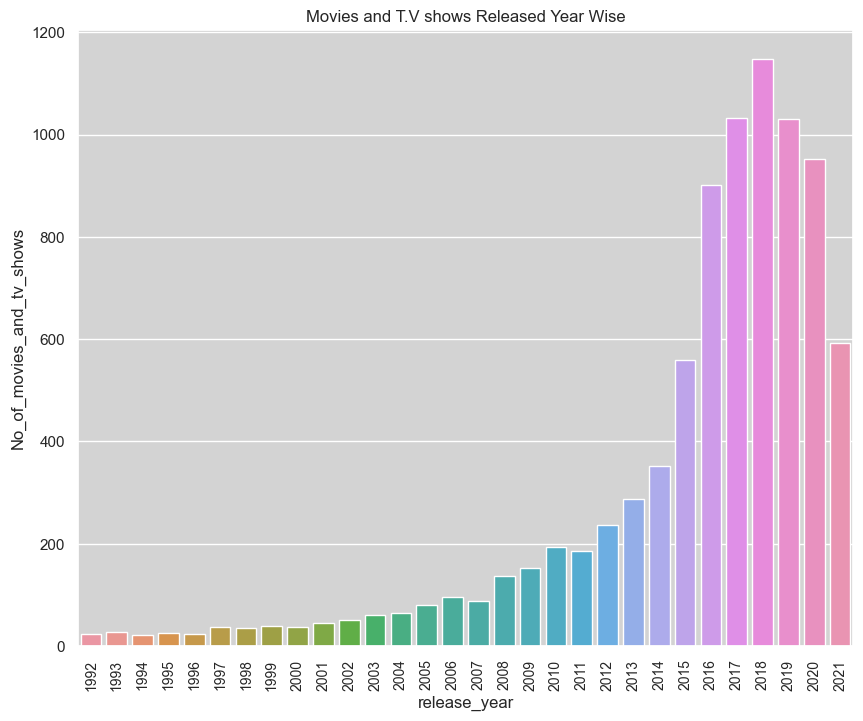

In [62]:
sns.set_theme(style="whitegrid")
sns.set(rc={"axes.facecolor":"lightgrey"})
plt.figure(figsize=(10,8))
sns.barplot(data=year_wise,x="release_year",y="No_of_movies_and_tv_shows")
plt.xticks(rotation=90 ,fontsize=10)
plt.title("Movies and T.V shows Released Year Wise")
plt.show()

##  Movies and TV shows Released Year Wise

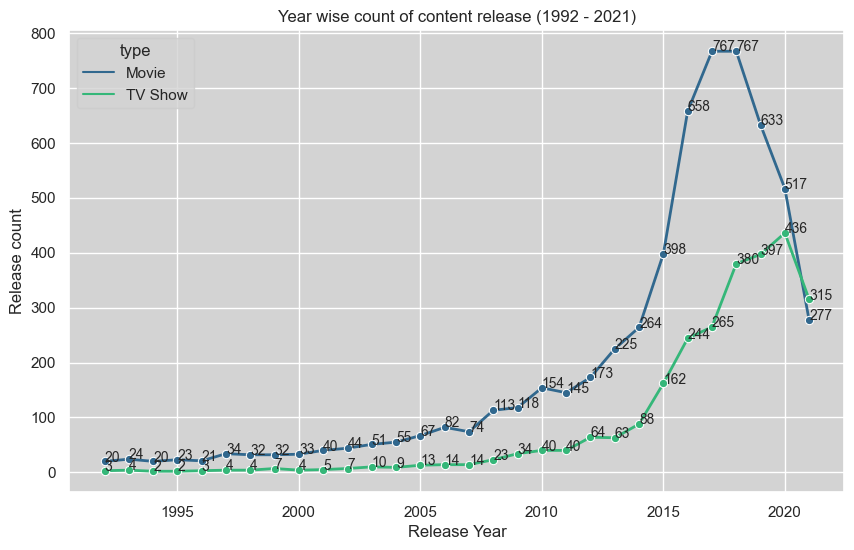

In [63]:
year_wise = pd.value_counts(df["release_year"]).reset_index().head(30)
year_wise.rename(columns={"index":"Year of release","release_year":"No. of titles"}, inplace = True)

df_mov_tv_rel = df[['type', 'release_year']]

df_mov_tv_rel = df_mov_tv_rel.value_counts().reset_index()
df_mov_tv_rel.rename(columns  = {0: 'count'}, inplace = True)

df_mov_tv_rel = df_mov_tv_rel[df_mov_tv_rel["release_year"]>=1992]

plt.figure(figsize = (10, 6))
a = sns.lineplot(data=df_mov_tv_rel, x="release_year", y="count", legend='auto', palette = 'viridis',hue ='type',linewidth = 2, marker = 'o')
for i, j in zip(df_mov_tv_rel["release_year"], df_mov_tv_rel["count"]):
    a.text(i, j, str(j), fontsize = 10) 
plt.title("Year wise count of content release (1992 - 2021)")
a.set_ylabel('Release count')
a.set_xlabel('Release Year')
plt.show()

- There is a Rapid Growth of Movies/Tv shows from the Year 2014 to 2018   .
- There is an Rapid Decline of Movies/Tv shows from the Year 2019 to 2021 .

## Content Added To Netflix Month Wise

In [71]:
Month = df[["date_added"]].replace(np.nan,"No_date")
Month["Release_month"] = Month["date_added"].apply(lambda x:x.lstrip().split(" ")[0])

In [72]:
Month["Release_month"].value_counts().head(12)

Release_month
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: count, dtype: int64

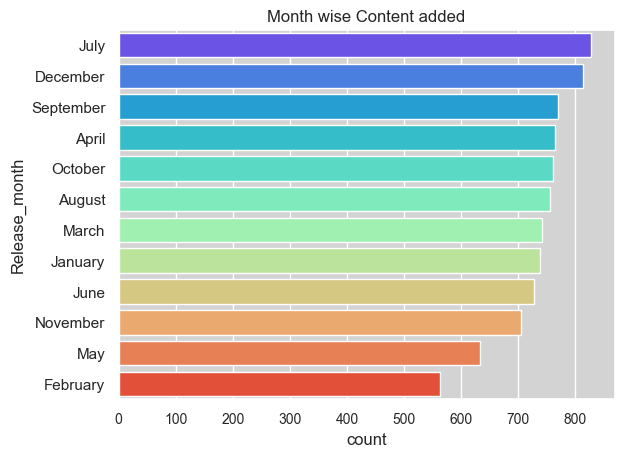

In [73]:
sns.set_theme(style="whitegrid")
sns.set(rc={"axes.facecolor":"lightgrey"})
sns.countplot(palette="rainbow",y= Month["Release_month"],order=pd.value_counts(Month["Release_month"]).head(12).index)
plt.xticks(fontsize=10)
plt.title("Month wise Content added")
plt.show()

- The growth in contents are higher in the month of July ,December, september
- Least number of contents are added in the month of February. 

## Month Wise Movies and TV Show added to Netflix

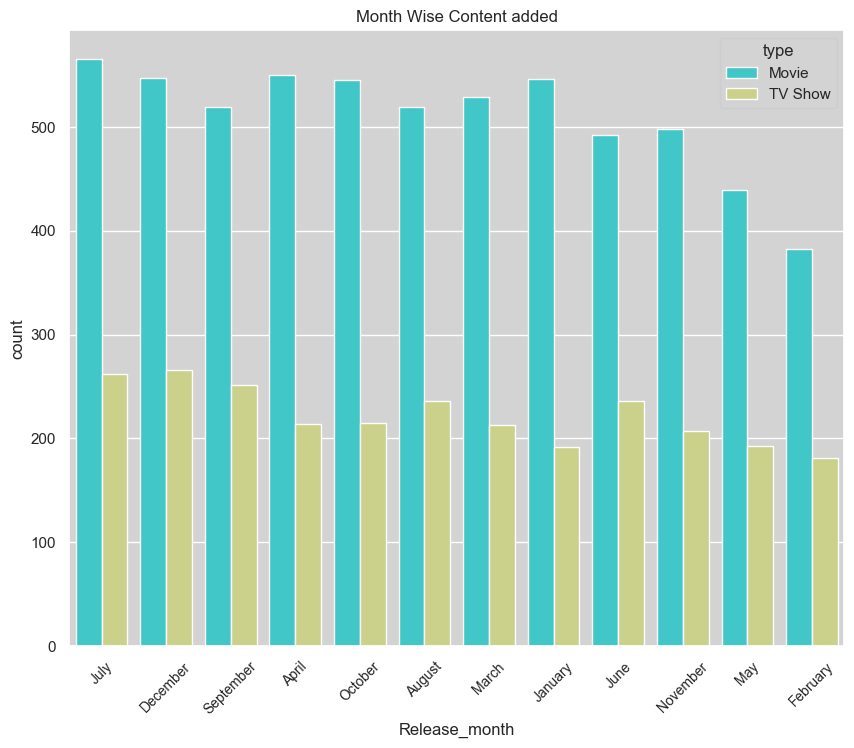

In [74]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.set(rc={"axes.facecolor":"lightgrey"})
sns.countplot(palette="rainbow",x= Month["Release_month"],hue=df["type"],order=pd.value_counts(Month["Release_month"]).head(12).index)
plt.xticks(rotation = 45,fontsize=10)
plt.title("Month Wise Content added")
plt.show()

- Most movies are Added on Netfilx in the Month of July,January,April, october and December.
- Least Movies of are Added on Netfilx in the month of February, May and June. 
- Most Tv Shows are Added on Netflix in the Month of July, December,September.
- Least Tv Shows are Added on Netflix in the Month of February, May, and January

##  Ratings According to the Movies and TV Show

In [75]:
df["rating"].value_counts()[:-3]

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

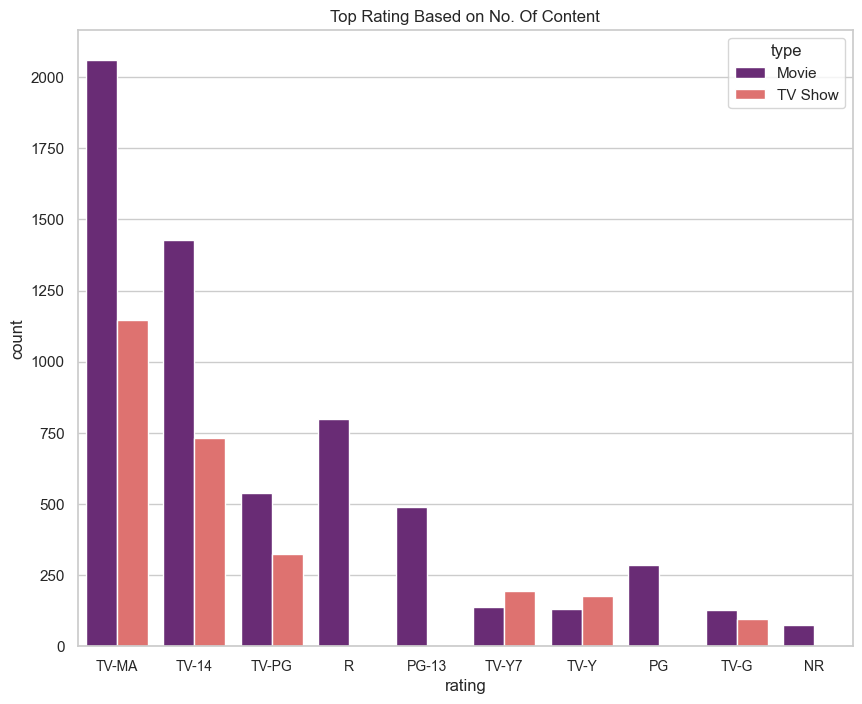

In [76]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.countplot(palette="magma",x=df["rating"],hue=df["type"],order=pd.value_counts(df["rating"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top Rating Based on No. Of Content")
plt.show()

- TV-Y :Designed to be appropriate for all children
- TV-Y7 :Suitable for ages 7 and up
-  G :Suitable for General Audiences
-  TV-G :Suitable for General Audiences
-  PG: Parental Guidance suggested
-  TV-PG: Parental Guidance suggested
-  PG-13:Parents strongly cautioned. May be inappropriate for ages under 13.
-  TV-14 : Parents strongly cautioned. May not be suitable for ages under 14.
-  R : Restricted. May be inappropriate for ages under 17.
-  TV-MA : For Mature Audiences
-  NC-17 : Inappropriate for ages 17 and under



- Most of the Movies and Tv Show are for Mature Audiencesfollowed by TV-14 rating


# Movies  Vs Tv show 

### Netflix_Movies

In [77]:
movies_df=df.loc[(df["type"]=="Movie")]
movies_df.reset_index()
movies_df.columns.name=None

### Top 10 Movies Directors

In [78]:
df_movie_dir=movies_df[["director"]]
df_movie_dir["director"]=df_movie_dir["director"].str.split(", ")
df_movie_dir= df_movie_dir.explode("director")

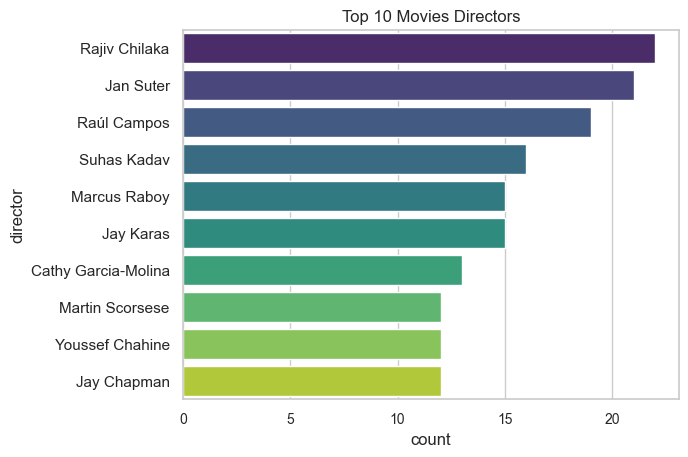

In [79]:
sns.set_theme(style="whitegrid")
sns.countplot(palette="viridis",y=df_movie_dir["director"],order=pd.value_counts(df_movie_dir["director"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top 10 Movies Directors")
plt.show()

#### Top 10 Movies Movies Actors

In [80]:
df_movie_cast=movies_df[["cast"]]
df_movie_cast["cast"]=df_movie_cast["cast"].str.split(", ")
df_movie_cast= df_movie_cast.explode("cast")

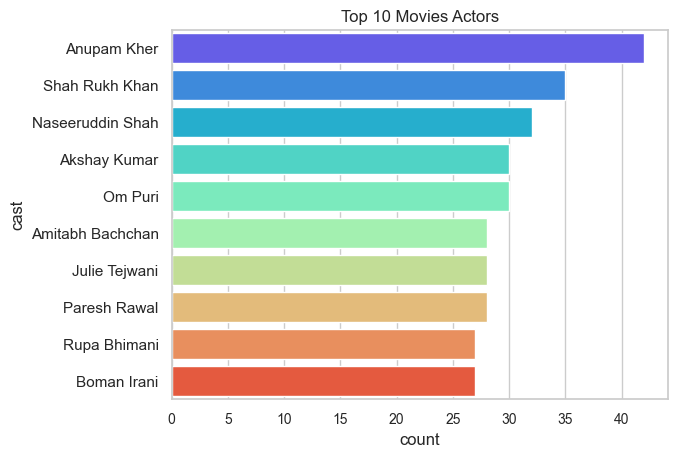

In [81]:
sns.set_theme(style="whitegrid")
sns.countplot(palette="rainbow",y=df_movie_cast["cast"],order=pd.value_counts(df_movie_cast["cast"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top 10 Movies Actors")
plt.show()

- Top 10 Actors who Acted in Movie all are from India

### Movies Duration in Boxplot

In [82]:
movies_df['duration'] = movies_df['duration'].astype(str).str.replace(' min', '')
movies_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [83]:
movies_df.dropna(subset=["duration"],axis=0,inplace=True)

In [84]:
movies_df["duration"]=movies_df["duration"].astype(float)

In [85]:
movies_df["duration"].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

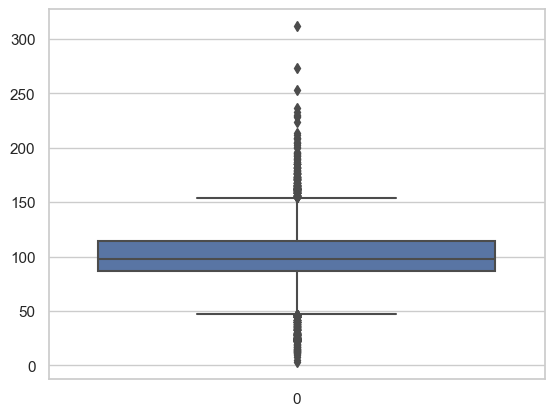

In [44]:
sns.boxplot(movies_df['duration'])
plt.show()

- we analyzed that there are few outliers in Duration of Movies
- The average duration of Movies is between 87 to 114 minutes
- The minumum duration of Movies is 50 minutes and Maximun Duration is 150 minutes as represented by wisker
- The minmum outliers below 50 and the maximum outliers are above 150  

#### Top 10 Movies Movies Genre

In [86]:
df_movie_genre=movies_df[["genre"]]
df_movie_genre["genre"]=df_movie_genre["genre"].str.split(", ")
df_movie_genre= df_movie_genre.explode("genre")

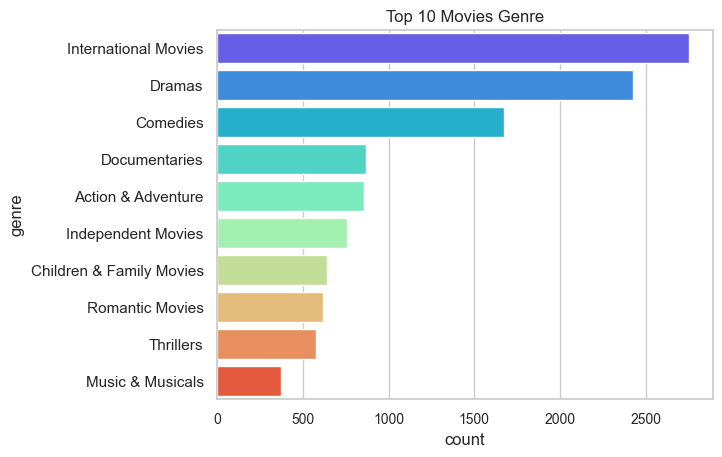

In [87]:
sns.set_theme(style="whitegrid")
sns.countplot(palette="rainbow",y=df_movie_genre["genre"],order=pd.value_counts(df_movie_genre["genre"]).head(10).index)
plt.xticks( fontsize=10)
plt.title("Top 10 Movies Genre")
plt.show()

- The top Genre are international Movies followed by Dramas and Comedies

## Netfix_Tv_shows

In [88]:
tv_show_df=df.loc[(df["type"]=="TV Show")]
tv_show_df.reset_index()
tv_show_df.columns.name=None

In [89]:
tv_show_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [90]:
tv_show_df['duration'].astype(str)

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2676, dtype: object

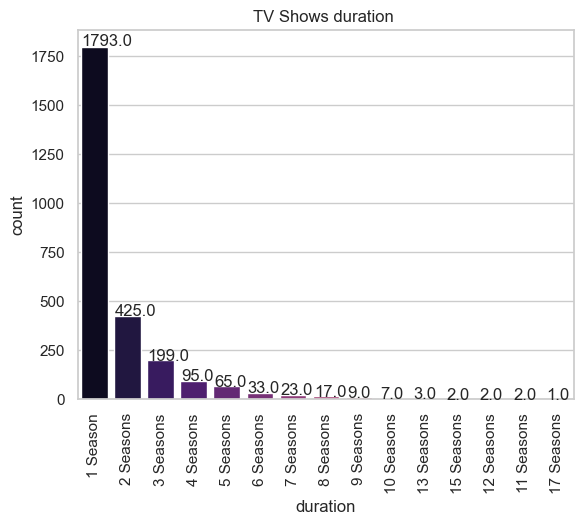

In [91]:
sns.set_theme(style="whitegrid")
ax=sns.countplot(palette="magma",x=tv_show_df['duration'],order=pd.value_counts(tv_show_df['duration']).index)
plt.xticks(rotation = 90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
plt.title("TV Shows duration ")
plt.show()

- we analyze the Tv show data and came to know 1793 shows have only 1 Season
- there only few shows which have more than 10 seasons
- there is one show which has 17 Seasons

### Top TV Shows Directors

In [92]:
df_tv_dir=tv_show_df[["director"]]
df_tv_dir["director"]=df_tv_dir["director"].str.split(", ")
df_tv_dir= df_tv_dir.explode("director")

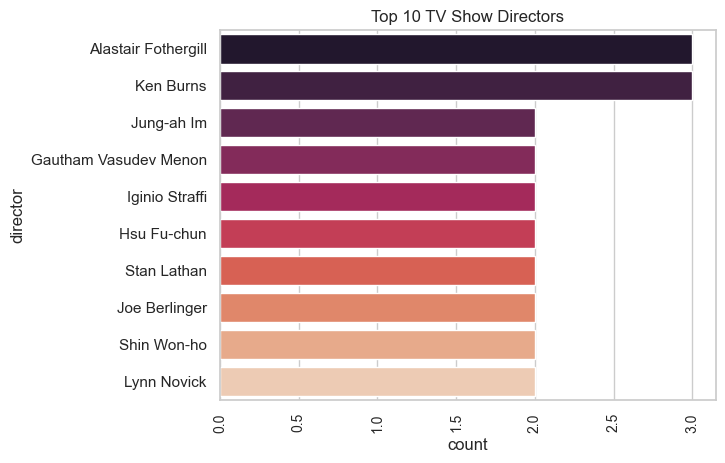

In [93]:
sns.set_theme(style="whitegrid")
sns.countplot(palette="rocket",y=df_tv_dir["director"],order=pd.value_counts(df_tv_dir["director"]).head(10).index)
plt.xticks(rotation=90, fontsize=10)
plt.title("Top 10 TV Show Directors")
plt.show()

In [94]:
df_tv_cast=tv_show_df[["cast"]]
df_tv_cast["cast"]=df_tv_cast["cast"].str.split(", ")
df_tv_cast= df_tv_cast.explode("cast")

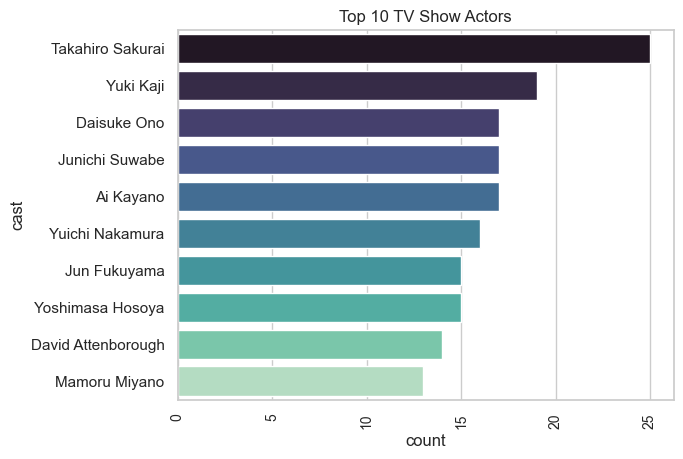

In [95]:
sns.set_theme(style="whitegrid")
sns.countplot(palette="mako",y=df_tv_cast["cast"],order=pd.value_counts(df_tv_cast["cast"]).head(10).index)
plt.xticks(rotation=90, fontsize=10)
plt.title("Top 10 TV Show Actors")
plt.show()

In [96]:
df_tv_genre=tv_show_df[["genre"]]
df_tv_genre["genre"]=df_tv_genre["genre"].str.split(", ")
df_tv_genre= df_tv_genre.explode("genre")

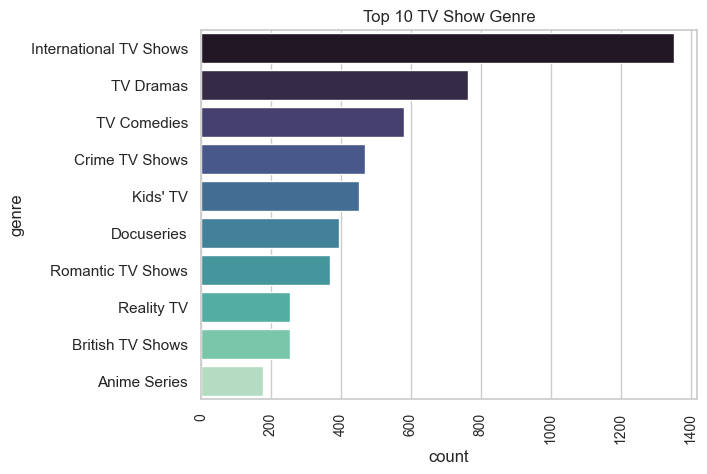

In [97]:
sns.set_theme(style="whitegrid")
sns.countplot(palette="mako",y=df_tv_genre["genre"],order=pd.value_counts(df_tv_genre["genre"]).head(10).index)
plt.xticks(rotation=90, fontsize=10)
plt.title("Top 10 TV Show Genre")
plt.show()

### Days on Which Content is added Every Month

In [98]:
Date = df[['date_added']].dropna()
Date['date'] = Date['date_added'].apply(lambda x : x.lstrip().split(' ')[1].replace(",",""))
Date['months'] = Date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
Date['years'] = Date['date_added'].apply(lambda x : x.split(', ')[-1])
Order_Of_Month = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November','December'][::-1]
df8 = Date.groupby('years')['months'].value_counts().unstack().fillna(0)[Order_Of_Month].T[::-1]   

In [99]:
Date['date'].value_counts().sort_values(ascending=False).reset_index().head()

,date,count
0,1,2212
1,15,687
2,2,325
3,16,289
4,31,274


In [100]:
perc_1 = (Date['date'].value_counts()[30]/Date['date'].value_counts().sum())*100
print((round(perc_1,2)),"%")

1.6 %


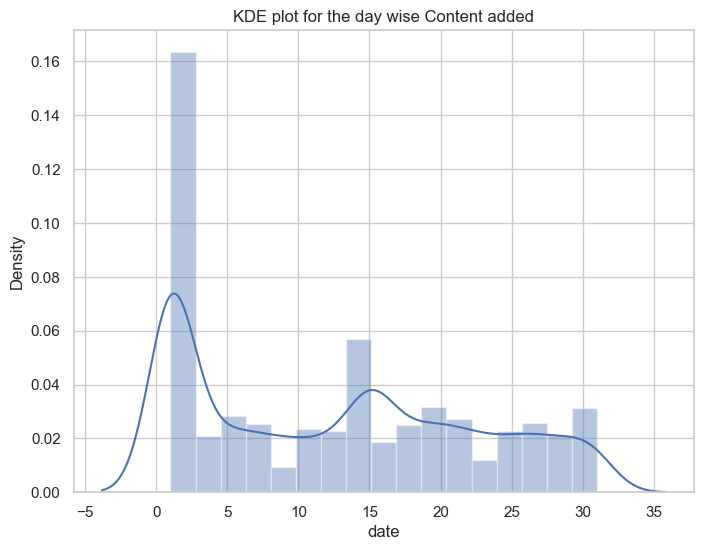

In [101]:
plt.figure(figsize=(8,6))
sns.distplot(Date['date'])
plt.title('KDE plot for the day wise Content added')
plt.show()

- We analyzed that content is added to the Netfix  on 1st date of the month nearly 25% of the times follwed by 15th date of the month nearly 7.8% of the time
- We analyzed that content is added to the Netflix on 29th date is the lowest among all the days is 1.6%

## Correlation of the Year  and Months of the content added

In [102]:
Date = df[['date_added']].dropna()
Date['months'] = Date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
Date['years'] = Date['date_added'].apply(lambda x : x.split(', ')[-1])
Order_Of_Month = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November','December'][::-1]
df8 = Date.groupby('years')['months'].value_counts().unstack().fillna(0)[Order_Of_Month].T[::-1]                                                                   

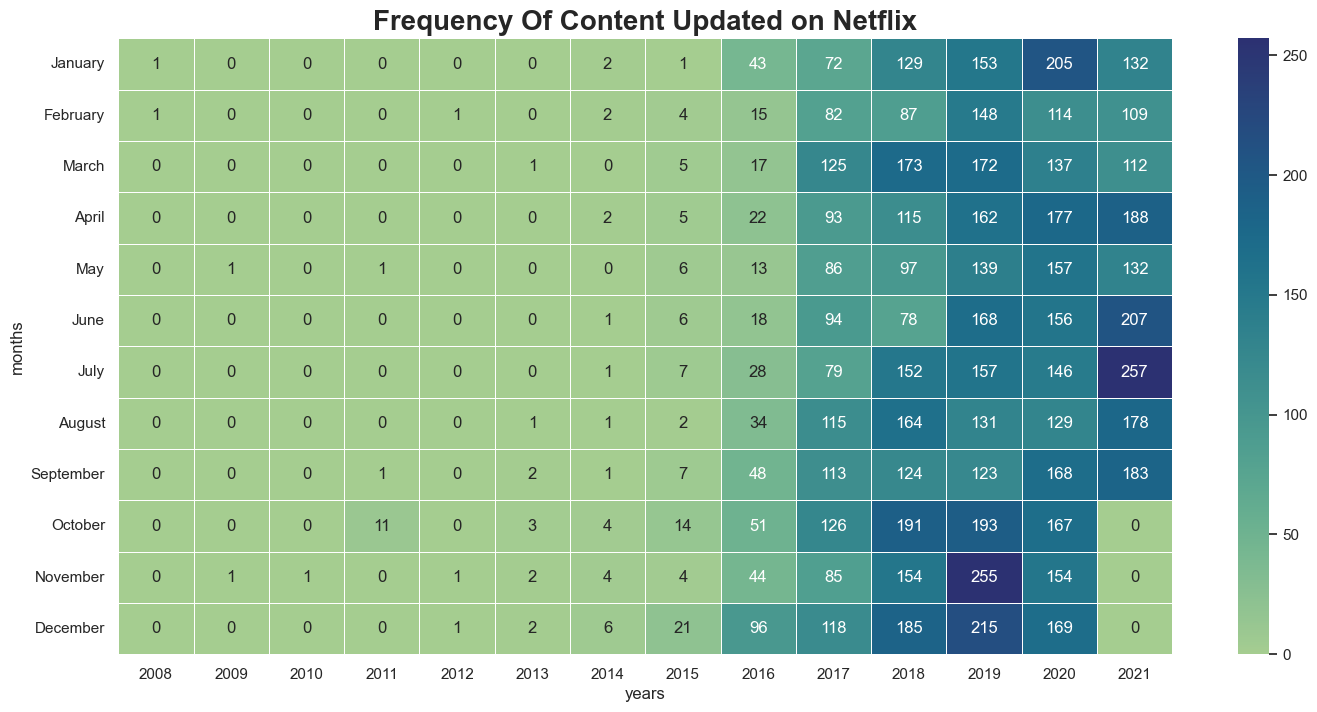

In [103]:
plt.figure(figsize=(17,8))
sns.heatmap(data=df8,annot=True,linewidth=0.5,fmt=".0f",cmap="crest")
plt.title('Frequency Of Content Updated on Netflix', fontsize=20,fontfamily='Arial', fontweight='bold')
plt.show()

- Most amount of content was added in july 2021 (257) followed by November 2019(255).
- There is a significant growth in content added on Netflix from 2016.

### 5. MISSING VALUE TREATMENT (Dropping Null Values)

In [63]:
df.dropna(subset=["duration", "rating", "date_added"], inplace = True)

In [64]:
round((df.isnull().sum()/df.shape[0]*100),2).sort_values(ascending = False)

director        29.82
country          9.43
cast             9.39
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
genre            0.00
description      0.00
dtype: float64

In [65]:
# Replacing NaN values in cast column with "No Cast"

df["cast"].replace(np.NaN, "No Cast", inplace = True)

In [66]:
# Replacing NaN values in country column with "Unknown"

df["country"].replace(np.NaN, "Unknown", inplace = True)

In [67]:
round((df.isna().sum()/df.shape[0]*100),2).sort_values(ascending = False)

director        29.82
show_id          0.00
type             0.00
title            0.00
cast             0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
genre            0.00
description      0.00
dtype: float64

### Insights based on Non-Graphical and Visual Analysis

- Nearly 2/3rd of the content on netflix are movies and remaining 1/3rd of them are TV Show.
- We can see that US, India, United Kingdom, Canada and France contribute 72.4% of the Top10 countries.
- About 1200 new movies were released in both 2018 and 2019.
- The growth in content started from 2014.
- The growth in contents are higher in the first three months and the last three months of the year.
- Least number of contents are added in the month of February.
- Most movies added in the months of July, December, April, october and January.
- Least movies added in the months of June, May and February.
- Most TV Shows added in the months of July and December.
- Least TV Shows added in the months of January and February.
- Analysed that content is added to Netflix on 1st date of the month.
- Most amount of content was added in july 2021 (257) followed by November 2019(255).
- There is a significant growth in content added on Netflix from 2016.
- TV-MA rating has the highest number of Movies and TV Shows available followed by TV-14 rating.
- we analyzed that there are few outliers in Duration of Movies.
- The average duration of Movies is between 87 to 114 minutes.
- The minumum duration of Movies is 50 minutes and Maximun Duration is 150 minutes as represented by wisker.
- The minmum outliers below 50 and the maximum outliers are above 150.  
- When we analyze the Tv show data we came to know 1793 shows have only 1 Season.
- where as we there only few shows which have more than 10 seasons.
- there is one show which has 17 Seasons.
- Anupam Kher has acted in the most number of Movies followed by Shah Rukh Khan and Naseeruddin Shah.
- All of the top 10 actors based on number of Movies are from India.

## Business Insights

- 72% of the content available on Netflix belongs to the movie category while Tv shows consists of the rest 30%.
- Rajiv Chilaka, Jan Suter and Raul campos have directed most amount of titles among Movies and TV Shows.
- Anupam Kher has acted in the most number of movies followed by Shah Rukh Khan and Naseeruddin Shah.
- All of the top 10 actors based on number of movies are of India.
- United States is the largest country producing movies on Netflix.
- International Movies is most watched Genre.
- In the year 2018, most movies and Tv shows were added.
- TV-MA rating has the highest number of rating for Movies and TV Shows.

### Recommendations 

#### 1. Which countries to target?
- United States, India, United Kingdom, Canada and France contribute 72.41% of the total content. So including content produced from these countries is recommended.
#### 2. Which Movie/TV Show genre to add?
- International Movies, Dramas, Comedies are the top 3 genres for Movies on Netflix.
- International TV Shows, TV Dramas, TV Comedies are the top 3 genres for TV Shows on Netflix.

#### 3. Average duration of the Movie/TV shows?
- Around 87 to 114 minutes for the movies
- 67% of the total number of TV Shows have only 1 Season. Not more than 3 seasons is recommended.

#### 4. In which month to add a Movie/TV show?
- For Movies, most months are suitable however, February, May and June should be looked into as they have the least amount of Movies added.
- For TV Shows, most months are suitable however, January, February and May should be looked into as they have the least amount of TV Shows added. 

#### 5. Which directors can be preferred for Movies/TV Shows?
- Rajiv Chilaka, Jan Suter, Raul Campos, Suhas Kadav and Marcus Raboy are top 5 most recurring directors that can be preferred.

#### 6. Which actors can be considered Movies/TV Shows?
- Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Akshay Kumar and Om Puri are the top 5 most recurring Movie actors.
- Takahiro Sakurai, Yuji Kaji, Junichi Suwabe, Daisuke Ono and Ai Kayano are the top 5 most recurring TV Shows actors.

#### 7. When to add new content?
- Usually 1st day of the month is most recurring day when new content is added however, 15th day of the month can also be considered as a second option which is considerably less than 1st day of the month.

#### 8. Which rating to consider?
- TV-MA is the most recurring rating for Movies as well as TV-Shows, so it is most recommended.

### Additional point to be considered:
- There is a significant drop in the amount of movies added to the Netflix after 2018 and for TV shows there is a drop after   
  2020, which must be looked into while making future business regarding adding content to Netflix.